## Lec35 Strong and weak relationships : Finding communities in Graph
### (Brute Force Method)

AIM :
To divide into two communities(Best Split)

* More connections within its community
* Less connections between communities

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np 
import itertools # For combinations

In [4]:
comb1 = itertools.combinations([1, 2, 3, 4], 2)
print comb1
print list(comb1)

[(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]


In [6]:
for i in itertools.combinations([1, 2, 3, 4], 3):
    print i

(1, 2, 3)
(1, 2, 4)
(1, 3, 4)
(2, 3, 4)


In [26]:
def communities_brute(G):
    nodes = G.nodes()
    n = G.number_of_nodes()
    
    first_community = []
    for i in range(1, n/2 + 1):
        comb = [list(x) for x in itertools.combinations(nodes, i)]
        first_community.extend(comb)
        
    second_community = []
    for i in range(len(first_community)):
        l = list(set(nodes) - set(first_community[i]))
        second_community.append(l)
        
    #print "First Community : "
    #print first_community
    #print "Second Community : "
    #print second_community
        
    #Which division is the best
    num_intra_edges1 = []
    num_intra_edges2 = []
    num_inter_edges = []
    ratio = [] # Ratio of number of intra edges and number of inter edges
    
    for i in range(len(first_community)):
        num_intra_edges1.append(G.subgraph(first_community[i]).number_of_edges())
        
    for i in range(len(second_community)):
        num_intra_edges2.append(G.subgraph(second_community[i]).number_of_edges())
    
    e = G.number_of_edges()
    
    for i in range(len(first_community)):
        num_inter_edges.append(e - num_intra_edges1[i] - num_intra_edges2[i])
        
    #Find the ratio
    for i in range(len(first_community)):
        ratio.append((float)(num_intra_edges1[i] + num_intra_edges2[i]) / num_inter_edges[i])
        
    max_value = max(ratio)
    max_index = ratio.index(max_value)
    
    print "(", first_community[max_index], ")", "(", second_community[max_index], ')'
        
        

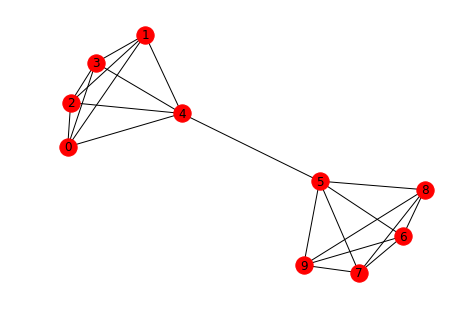

In [9]:
#Two cliques each of size 5 connected by a path having 0 node(s).
G = nx.barbell_graph(5, 0)
nx.draw(G, with_labels=1)
plt.show()

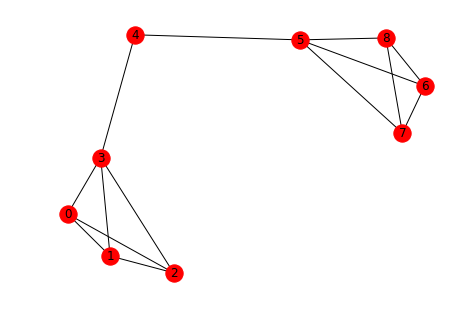

In [10]:
G = nx.barbell_graph(4, 1)
nx.draw(G, with_labels=1)
plt.show()

In [27]:
G = nx.barbell_graph(5, 0)
communities_brute(G)

( [0, 1, 2, 3, 4] ) ( [8, 9, 5, 6, 7] )
